# Assignment
## 1)

In [44]:
# Used libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [25]:
df=pd.read_csv('Country-data.csv')
df.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
121,Poland,6.0,40.1,7.46,42.1,21800,1.660,76.3,1.41,12600
155,Uganda,81.0,17.1,9.01,28.6,1540,10.600,56.8,6.15,595
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Check on column values
df.country.nunique()

167

167 values, same as the data records count. So, no need for this ```'country'``` column.

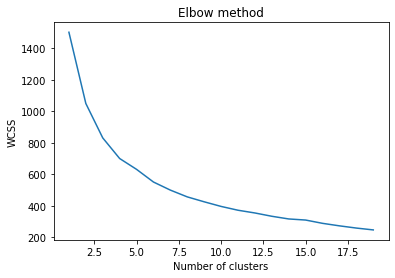

In [26]:
df.drop('country',1,inplace=True)

# Scale the data down for better processing inside ML algorithms
scaler=StandardScaler()
X=scaler.fit_transform(df)

# Elbow method for K-Means Clustering Algorithm
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i).fit(X)
    wcss.append(kmeans.inertia_)
    
# Visualizing the elbow shape
plt.plot(range(1,20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

We can deduce 7 clusters to use.

In [33]:
kmeans=KMeans(n_clusters=7).fit(X)
clusters=kmeans.predict(X)
df['Cluster']=clusters
df.head(7)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,5
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,5


- Using Heirarchical Clustering with Dendrogram

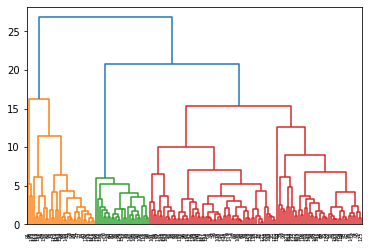

In [41]:
dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))

In [42]:
model=AgglomerativeClustering(n_clusters=5)
clustering=model.fit_predict(X)
df['Cluster']=clustering
df.head(7)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,4


- Principal Component Analysis (PCA)

In [47]:
pca=PCA(n_components=6)
red_X=pca.fit_transform(X)
red_X

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
        -0.25459744],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732,
         0.08457863],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465,
        -0.4016955 ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, -1.07409791,  1.17608067,
         0.05160677],
       [-1.88745106, -0.10945301,  1.10975159,  0.05625677,  0.61836532,
        -0.54091719],
       [-2.86406392,  0.48599799,  0.22316658,  0.81636436, -0.27406773,
         0.20137816]])